In [152]:
%load_ext autoreload
%autoreload

import pandas as pd
import numpy as np
import qgrid
import beakerx as bx
from datetime import datetime as dtt

from pa_lib.file import data_files, load_bin, store_bin, store_excel
from pa_lib.data import calc_col_partitioned, clean_up_categoricals, flatten, replace_col, cond_col, desc_col
from pa_lib.util import obj_size
from pa_lib.log  import time_log
from pa_lib.types import dtFactor

# display long columns completely
pd.set_option('display.max_colwidth', 200)

pd.set_option('display.max_rows', 200)

qgrid.set_grid_option()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data Setup

In [2]:
data_files()

,size,mtime
name,,
bd_by_week.feather,85.6 MB,06.05.19 11:55:33
bd_data.feather,197.4 MB,06.05.19 10:10:42
bd_data_raw.feather,328.5 MB,06.05.19 10:10:32
bd_data_vkprog.feather,69.4 MB,06.05.19 10:10:44
bd_ek_minmax.feather,1.4 MB,06.05.19 11:58:27
bd_long_by_week.feather,9.2 MB,06.05.19 11:57:13
crm_data.feather,51.7 MB,06.05.19 09:50:44
crm_data_vkprog.feather,42.8 MB,06.05.19 09:50:46
plz_data.feather,135.7 KB,06.05.19 09:50:09


In [4]:
bd = load_bin('bd_data.feather')

2019-05-08 13:51:27 [INFO] Reading from file /home/pa/data/bd_data.feather
2019-05-08 13:51:28 [INFO] Finished loading binary file in 0.21s (0.56s CPU)


In [4]:
desc_col(bd, det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
ENDKUNDE_NR,category,0/1500629,41337,7.3 MB,"[100034,655195]"
ENDKUNDE,category,0/1500629,38750,10.0 MB,"[ IWIKO - Institut für Wirtschafts-Komm.,ô quai des arts]"
EK_ABC,category,5395/1495234,8,1.4 MB,"[nan,NO]"
EK_PLZ,category,398/1500231,3453,3.2 MB,"[nan,WC2H OBA 1]"
EK_ORT,category,397/1500232,3490,3.3 MB,"[nan,genève]"
EK_LAND,category,397/1500232,59,1.4 MB,"[nan,USA]"
EK_HB_APG_KURZZ,category,105096/1395533,95,1.4 MB,"[nan,YIL]"
EK_AKTIV,category,0/1500629,2,1.4 MB,"[0,1]"
AGENTUR,category,757072/743557,4558,3.4 MB,"[nan,Österreich Werbung]"
VERKAUFSBERATER,category,0/1500629,176,2.9 MB,"[ABB,ZHU]"


#### Filtered data: Only above-zero

In [5]:
bd = bd.loc[(bd.NETTO >= 0)].pipe(clean_up_categoricals)

#### Reduced data: Only from 2014

In [6]:
data = bd.loc[(bd.KAMP_ERFASS_JAHR > 2014)].pipe(clean_up_categoricals)

### Set up plotting

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.dpi'] = 90
plt.rcParams['figure.figsize'] = [15, 10]

### Plots

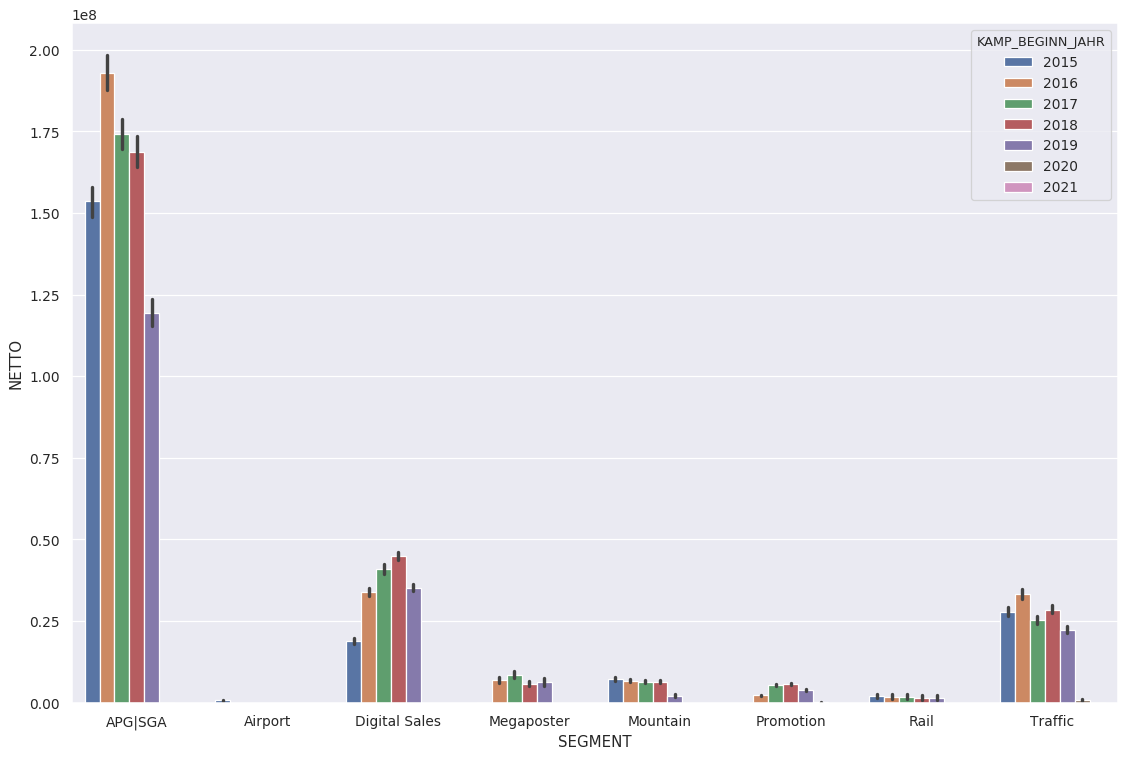

In [9]:
sns.barplot(data=data, x="SEGMENT", y="NETTO", hue='KAMP_BEGINN_JAHR', estimator=np.sum)

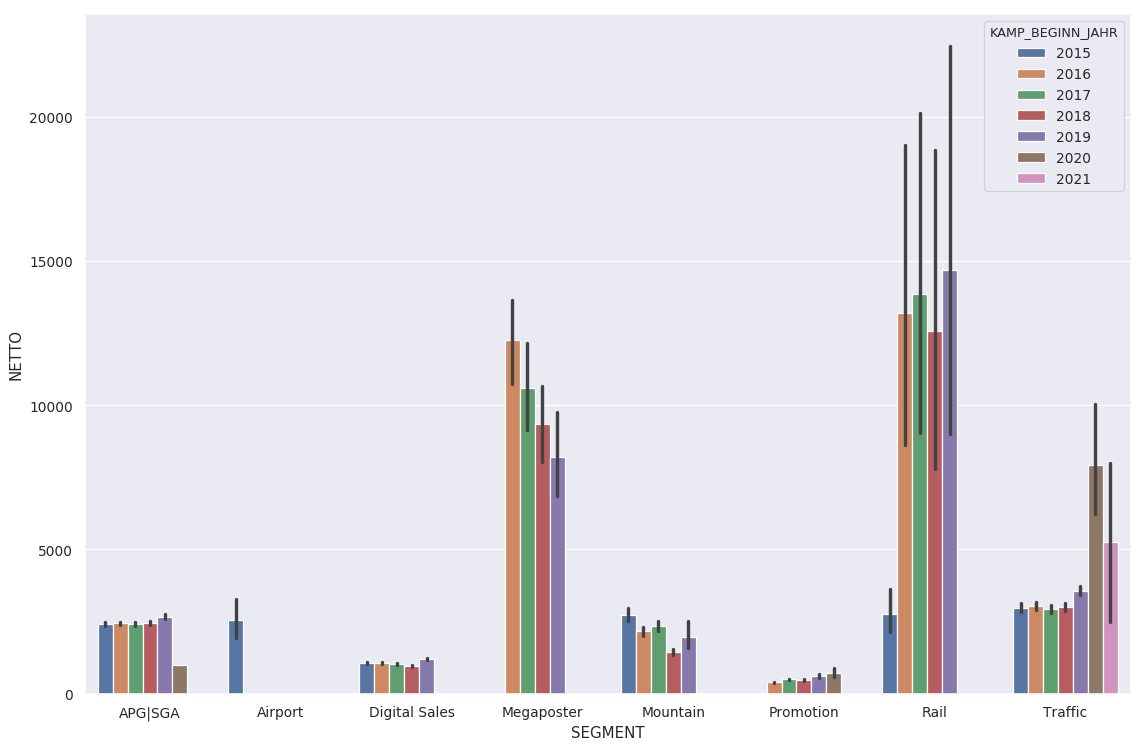

In [17]:
sns.barplot(data=data, x="SEGMENT", y="NETTO", hue='KAMP_BEGINN_JAHR', estimator=np.mean)

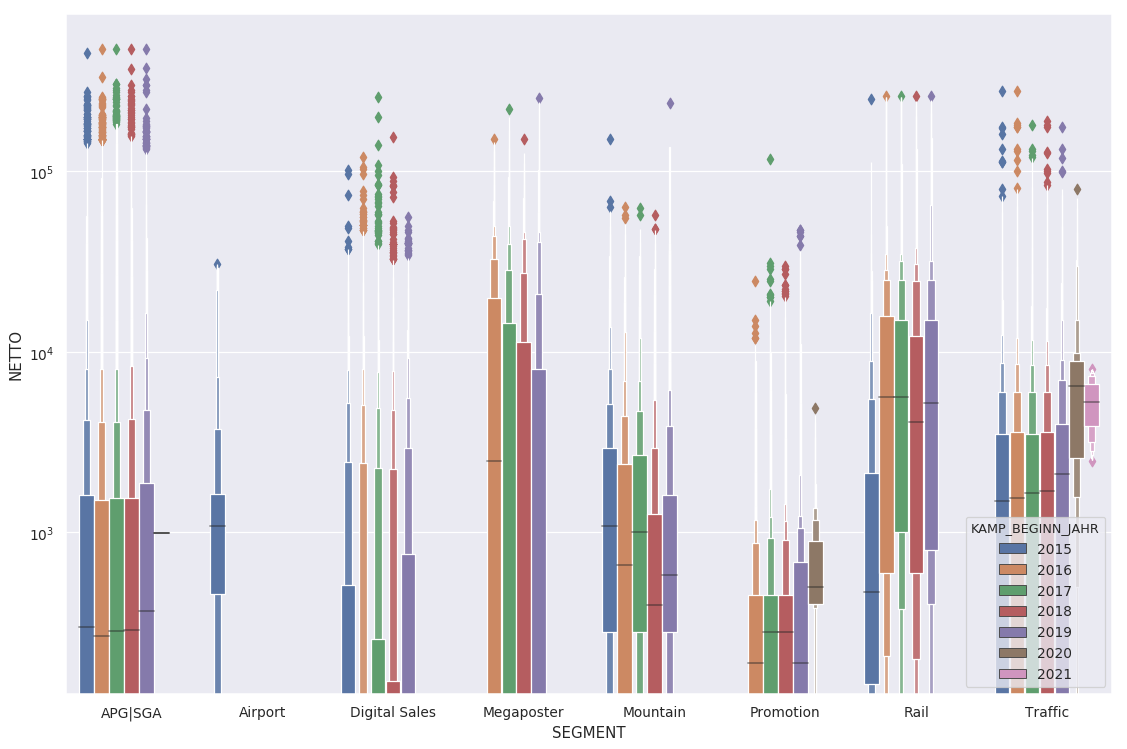

In [20]:
plt.yscale('log')
sns.boxenplot(data=data, x='SEGMENT', y='NETTO', hue='KAMP_BEGINN_JAHR')

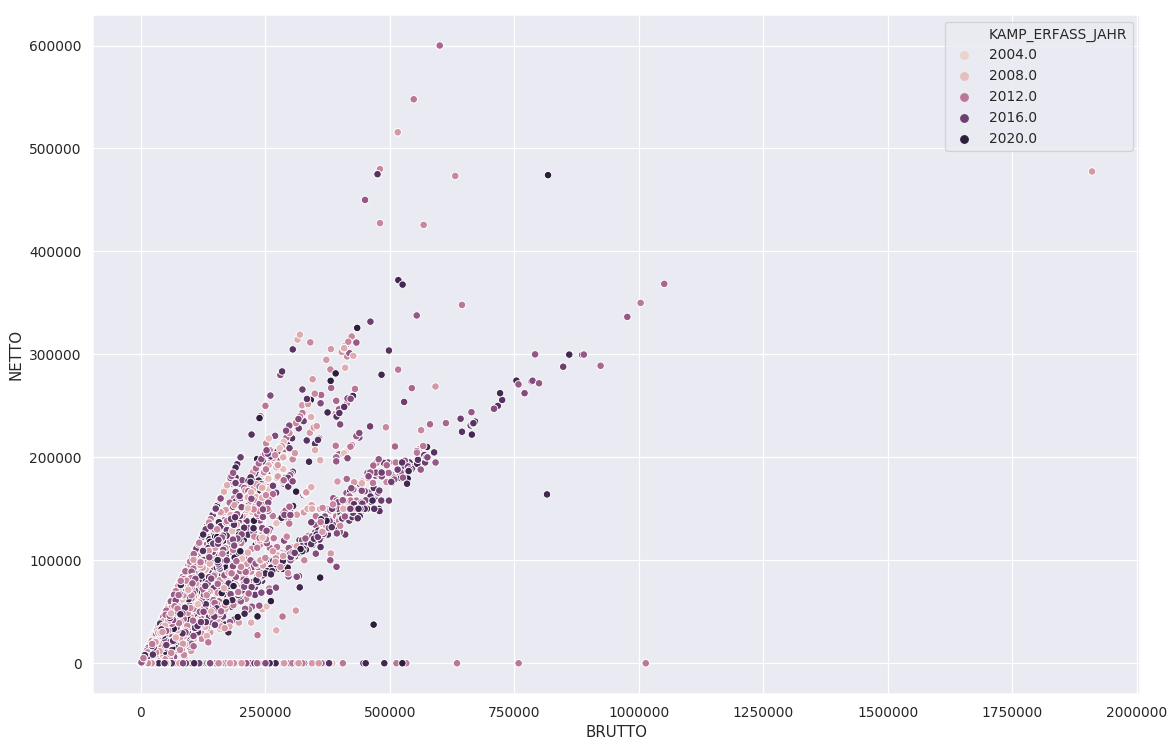

In [32]:
sns.scatterplot(x=bd.BRUTTO, y=bd.NETTO, hue=bd.KAMP_ERFASS_JAHR.astype('float'))

In [25]:
qgrid.show_grid(bd.loc[bd.BRUTTO > 1000000].sort_values('BRUTTO', ascending=False).transpose())

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [17]:
desc_col(data, det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
ENDKUNDE_NR,category,0/301355,19141,13.6 MB,"[100034,655106]"
ENDKUNDE,category,0/301355,18241,14.9 MB,"[""einfach-luxuriös"",ängelibeck]"
EK_ABC,category,16/301339,8,12.6 MB,"[nan,NO]"
EK_PLZ,category,36/301319,2415,13.1 MB,"[nan,WC2E 9JL]"
EK_ORT,category,36/301319,2386,13.1 MB,"[nan,Zürich Mülligen]"
EK_LAND,category,36/301319,36,12.6 MB,"[nan,USA]"
EK_HB_APG_KURZZ,category,16694/284661,50,12.6 MB,"[nan,YAM]"
EK_AKTIV,category,0/301355,2,12.6 MB,"[0,1]"
AGENTUR,category,152015/149340,2079,13.1 MB,"[nan,Österreich Werbung]"
VERKAUFSBERATER,category,0/301355,109,12.6 MB,"[ABS,ZHU]"


/home/pa/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/pa/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


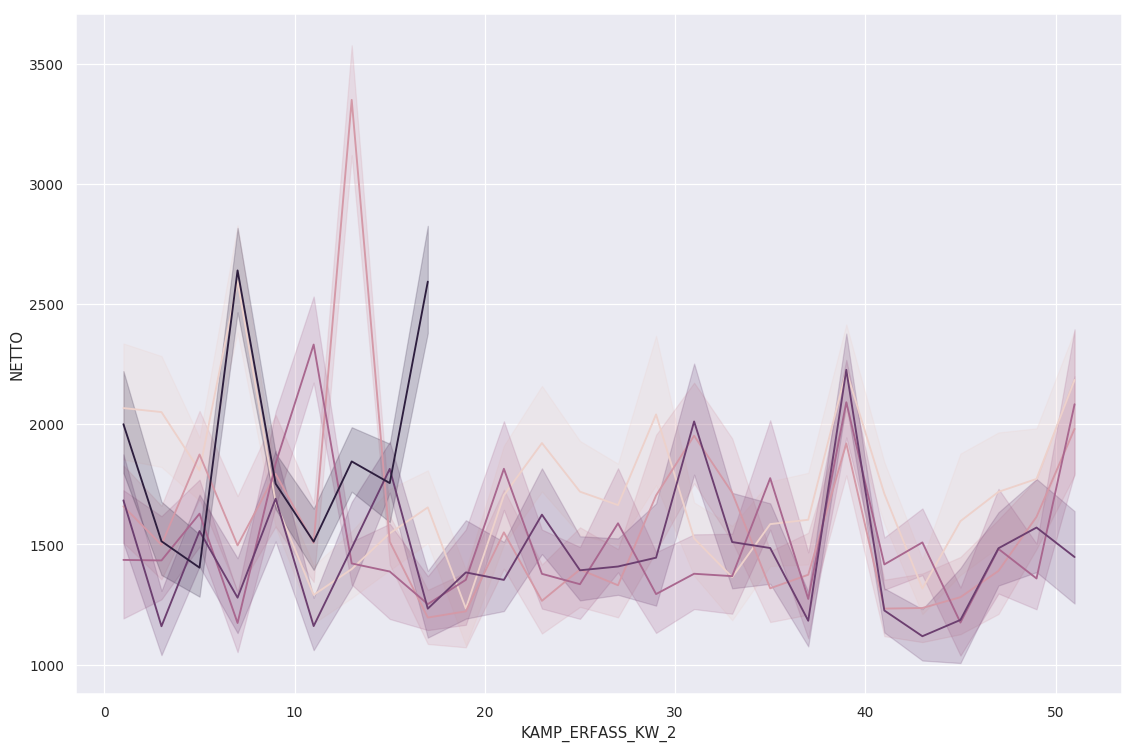

In [39]:
sns.lineplot(x=data.KAMP_ERFASS_KW_2, y=data.NETTO, hue=data.KAMP_ERFASS_JAHR, legend=False)

### Netto Reservation und Aushang per Endkunde und KW2

In [10]:
from concurrent.futures import ProcessPoolExecutor

def sum_calc(param):
    (df, col_year, col_week) = param
    return (df.groupby(['ENDKUNDE_NR', col_year, col_week], observed=False, as_index=False)[['NETTO']].agg('sum'))

with time_log('calculating sums'):
    with ProcessPoolExecutor(max_workers=2) as executor:
        (data_res, data_aus) = tuple(executor.map(sum_calc, [(data, 'KAMP_ERFASS_JAHR', 'KAMP_ERFASS_KW_2'), 
                                                             (data, 'KAMP_BEGINN_JAHR', 'KAMP_BEGINN_KW_2')]))

    data_by_week = (data_res.merge(data_aus,  
                                   left_on=['ENDKUNDE_NR', 'KAMP_ERFASS_JAHR', 'KAMP_ERFASS_KW_2'], 
                                   right_on=['ENDKUNDE_NR', 'KAMP_BEGINN_JAHR', 'KAMP_BEGINN_KW_2'], 
                                   how='outer', suffixes=('_res', '_aus'))
                            .rename({'KAMP_ERFASS_JAHR': 'Jahr', 'KAMP_ERFASS_KW_2': 'Kw', 'NETTO_res': 'Res', 'NETTO_aus': 'Aus'}, 
                                    axis='columns'))

    data_by_week = (data_by_week.fillna({'Jahr': data_by_week.KAMP_BEGINN_JAHR, 'Kw': data_by_week.KAMP_BEGINN_KW_2, 'Res': 0, 'Aus': 0})
                                .drop(['KAMP_BEGINN_JAHR', 'KAMP_BEGINN_KW_2'], axis='columns')
                                .sort_values(['Jahr', 'ENDKUNDE_NR', 'Kw'])
                                .reset_index(drop=True))

store_bin(data_by_week, 'bd_by_week.feather')

2019-05-08 13:54:39 [INFO] Finished calculating sums in 123.87s (20.27s CPU)
2019-05-08 13:54:39 [INFO] Writing to file /home/pa/data/bd_by_week.feather
2019-05-08 13:54:40 [INFO] Written 85.6 MB
2019-05-08 13:54:40 [INFO] Finished storing binary file in 0.2s (1.56s CPU)


In [11]:
data_by_week = load_bin('bd_by_week.feather')

2019-05-08 13:54:45 [INFO] Reading from file /home/pa/data/bd_by_week.feather
2019-05-08 13:54:45 [INFO] Finished loading binary file in 0.07s (0.12s CPU)


In [12]:
desc_col(data_by_week, det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
ENDKUNDE_NR,category,0/4477018,24599,9.4 MB,"[100034,655195]"
Jahr,category,0/4477018,7,4.3 MB,"[2015,2021]"
Kw,category,0/4477018,26,4.3 MB,"[1,51]"
Res,float64,0/4477018,20314,34.2 MB,"[0.0,6770521.0]"
Aus,float64,0/4477018,20544,34.2 MB,"[0.0,1636724.0]"


In [13]:
data_non_zero = (data_by_week
                 .query('Res > 0 or Aus > 0')
                 .pipe(clean_up_categoricals))

ek_minmax = (data_non_zero
             .assign(Jahr_Kw = data_non_zero.Jahr.astype('str').str.cat(
                               data_non_zero.Kw.astype('str'), sep='_')
                               .str.replace(r'_(\d)$', r'_0\g<1>') # make Kw two digits for sorting
                               .astype('str'))
             .drop(['Kw', 'Jahr'], axis='columns')
             .groupby('ENDKUNDE_NR')
             .agg({'Res': 'sum', 'Aus': 'sum', 'Jahr_Kw': ['min', 'max']}))

In [14]:
cols = [f'{fld}_{agg}' for (fld, agg) in ek_minmax.columns.to_flat_index()]
ek_minmax.set_axis(labels=cols, axis='columns', inplace=True)

In [45]:
qgrid.set_grid_option('minVisibleRows', 1)
qgrid.set_grid_option('maxVisibleRows', 20)

qgrid.show_grid(ek_minmax)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Vollständige Daten per KW2

In [15]:
from concurrent.futures import ProcessPoolExecutor

def sum_calc(param):
    (df, col_year, col_week) = param
    return (df.groupby(['ENDKUNDE_NR', col_year, col_week], observed=True, as_index=False)[['NETTO']].agg('sum'))

with time_log('calculating sums'):
    with ProcessPoolExecutor(max_workers=2) as executor:
        (bd_res,bd_aus) = tuple(executor.map(sum_calc, [(bd, 'KAMP_ERFASS_JAHR', 'KAMP_ERFASS_KW_2'), 
                                                        (bd, 'KAMP_BEGINN_JAHR', 'KAMP_BEGINN_KW_2')]))

    bd_by_week = (bd_res.merge(bd_aus,  
                               left_on=['ENDKUNDE_NR', 'KAMP_ERFASS_JAHR', 'KAMP_ERFASS_KW_2'], 
                               right_on=['ENDKUNDE_NR', 'KAMP_BEGINN_JAHR', 'KAMP_BEGINN_KW_2'], 
                               how='outer', suffixes=('_res', '_aus'))
                        .rename({'KAMP_ERFASS_JAHR': 'Jahr', 'KAMP_ERFASS_KW_2': 'Kw', 'NETTO_res': 'Res', 'NETTO_aus': 'Aus'}, 
                                axis='columns'))

    bd_by_week = (bd_by_week.fillna({'Jahr': bd_by_week.KAMP_BEGINN_JAHR, 'Kw': bd_by_week.KAMP_BEGINN_KW_2, 'Res': 0, 'Aus': 0})
                            .drop(['KAMP_BEGINN_JAHR', 'KAMP_BEGINN_KW_2'], axis='columns')
                            .sort_values(['Jahr', 'ENDKUNDE_NR', 'Kw'])
                            .reset_index(drop=True))

store_bin(bd_by_week, 'bd_long_by_week.feather')

2019-05-08 13:55:16 [INFO] Finished calculating sums in 2.0s (4.63s CPU)
2019-05-08 13:55:16 [INFO] Writing to file /home/pa/data/bd_long_by_week.feather
2019-05-08 13:55:16 [INFO] Written 9.2 MB
2019-05-08 13:55:16 [INFO] Finished storing binary file in 0.04s (0.26s CPU)


In [47]:
bd_by_week = load_bin('bd_long_by_week.feather')

2019-05-06 11:57:20 [INFO] Reading from file /home/pa/data/bd_long_by_week.feather
2019-05-06 11:57:20 [INFO] Finished loading binary file in 0.01s (0.02s CPU)


In [49]:
desc_col(bd_by_week, det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
ENDKUNDE_NR,category,0/422980,41336,3.2 MB,"[100034,655195]"
Jahr,category,0/422980,15,413.9 KB,"[2007,2021]"
Kw,category,0/422980,26,414.6 KB,"[1,51]"
Res,float64,0/422980,32644,3.2 MB,"[0.0,6770521.0]"
Aus,float64,0/422980,32869,3.2 MB,"[0.0,1636724.0]"


In [50]:
qgrid.set_grid_option('minVisibleRows', 1)
qgrid.set_grid_option('maxVisibleRows', 20)

qgrid.show_grid(bd_by_week)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [51]:
qgrid.show_grid(bd.loc[(bd.ENDKUNDE_NR==483063) & (bd.KAMP_BEGINN_JAHR==2014) & (bd.KAMP_BEGINN_KW_2.isin([23, 45]))].transpose())

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### New/leaving customers

In [208]:
bd_non_zero = (bd_by_week
                 .query('Res > 0 or Aus > 0')
                 .pipe(clean_up_categoricals))

ek_minmax = (bd_non_zero
             .assign(Jahr_Kw = bd_non_zero.Jahr.astype('float') + bd_non_zero.Kw.astype('float') / 53)
             .groupby('ENDKUNDE_NR')
             .agg({'Res': 'sum', 'Aus': 'sum', 'Jahr_Kw': ['min', 'max']}))

cols = [f'{fld}_{agg}' for (fld, agg) in ek_minmax.columns.to_flat_index()]
ek_minmax.set_axis(labels=cols, axis='columns', inplace=True)

ek_minmax = (ek_minmax
             .assign(Lifetime = np.subtract(ek_minmax.Jahr_Kw_max, ek_minmax.Jahr_Kw_min)))

In [108]:
ek_minmax.reset_index(inplace=True)
store_bin(ek_minmax, 'bd_ek_minmax.feather')

2019-05-09 08:54:54 [INFO] Writing to file /home/pa/data/bd_ek_minmax.feather
2019-05-09 08:54:54 [INFO] Written 1.5 MB
2019-05-09 08:54:54 [INFO] Finished storing binary file in 0.01s (0.01s CPU)


In [109]:
ek_minmax.sort_values(['Jahr_Kw_max', 'Jahr_Kw_min'], inplace=True)

In [110]:
end_jahr = (np.rint(ek_minmax.Jahr_Kw_max).astype('int').value_counts().reset_index().sort_values('index')
            .reset_index(drop=True).set_axis(['end_jahr', 'cnt'], axis='columns', inplace=False))

start_jahr = (np.rint(ek_minmax.Jahr_Kw_min).astype('int').value_counts().reset_index().sort_values('index')
              .reset_index(drop=True).set_axis(['start_jahr', 'cnt'], axis='columns', inplace=False))

start_end_jahre = start_jahr.merge(end_jahr, left_on='start_jahr', right_on='end_jahr', how='outer', suffixes=('_start', '_end'))

start_end_jahre = (start_end_jahre.fillna({'start_jahr': start_end_jahre.end_jahr, 'cnt_start': 0, 'cnt_end': 0})
                                  .drop('end_jahr', axis='columns'))

start_end_jahre = start_end_jahre.assign(saldo = np.subtract(np.cumsum(start_end_jahre.cnt_start), np.cumsum(start_end_jahre.cnt_end)))

qgrid.show_grid(start_end_jahre)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [209]:
qgrid.show_grid(ek_minmax)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [86]:
import bokeh
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [210]:
p = figure(title="Endkunden: Lebensdauer vs. Umsatz/Jahr", x_axis_label='Lifetime', y_axis_label='Umsatz / Jahr', 
           plot_width=900, y_axis_type="log")

p.circle(y=ek_minmax.Aus_sum / ek_minmax.Lifetime, x=ek_minmax.Lifetime, size=4, line_color='navy')

show(p)

In [114]:
desc_col(ek_minmax, True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
ENDKUNDE_NR,category,0/31330,31330,1.8 MB,"[100034,655195]"
Res_sum,float64,0/31330,17482,489.5 KB,"[19.0,79939360.0]"
Aus_sum,float64,0/31330,17416,489.5 KB,"[0.0,79729902.0]"
Jahr_Kw_min,float64,0/31330,300,489.5 KB,"[2007.245283018868,2019.3207547169811]"
Jahr_Kw_max,float64,0/31330,302,489.5 KB,"[2008.3207547169811,2021.811320754717]"
Lifetime,float64,0/31330,922,489.5 KB,"[0.0,12.849056603773533]"


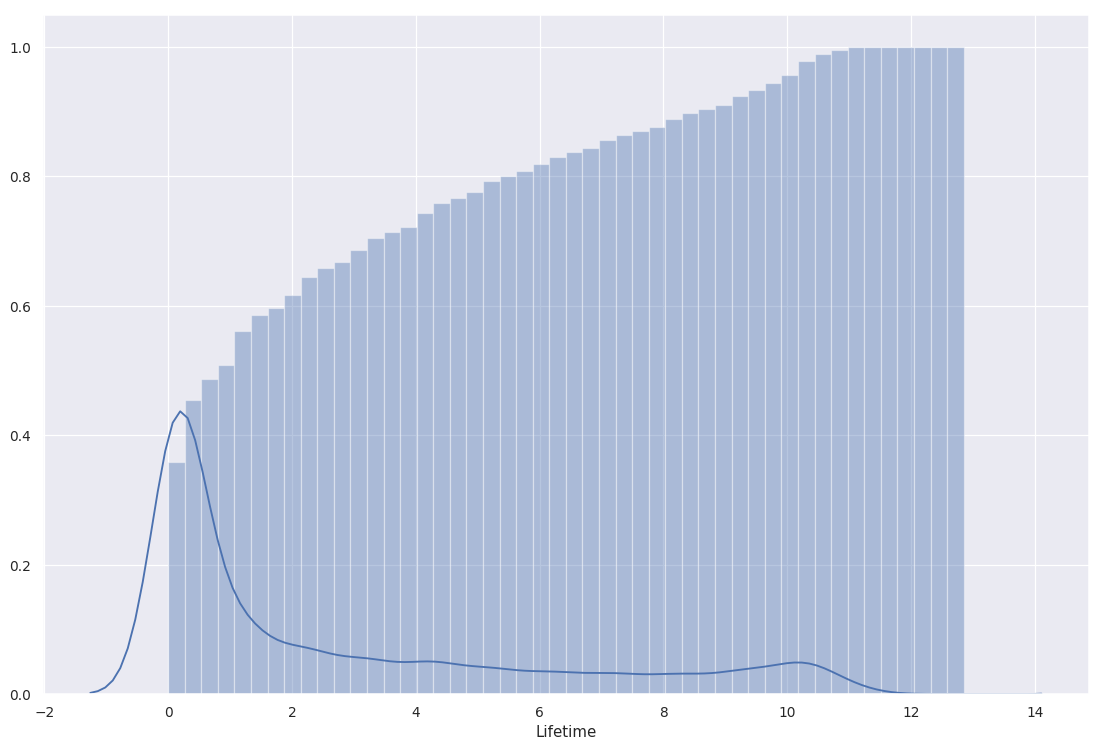

In [119]:
import seaborn as sns

sns.distplot(ek_minmax.Lifetime, hist_kws=dict(cumulative=True))

### Schlussfolgerungen

- 50% aller Kunden in den letzten 10 Jahren blieben nicht länger als ein Jahr
- Die Kunden-Lebensdauer hat Halbjahres-Peaks, wahrscheinlich wegen der Dispo-Eröffnungsdaten?
- Pro Jahr kommen und gehen zwischen 2000 und 3000 Kunden, "aktiv" sind zwischen 8000 und 9500

## Analyse Kunden vs. Vertragstypen

In [140]:
bd.columns

Index(['ENDKUNDE_NR', 'ENDKUNDE', 'EK_ABC', 'EK_PLZ', 'EK_ORT', 'EK_LAND',
       'EK_HB_APG_KURZZ', 'EK_AKTIV', 'AGENTUR', 'VERKAUFSBERATER',
       'ENDKUNDE_BRANCHENGRUPPE_ID', 'ENDKUNDE_BRANCHENGRUPPE',
       'ENDKUNDE_NBRANCHENGRUPPE_ID', 'ENDKUNDE_NBRANCHENGRUPPE',
       'ENDKUNDE_BRANCHENKAT_ID', 'ENDKUNDE_BRANCHENKAT',
       'ENDKUNDE_NBRANCHENKAT_ID', 'ENDKUNDE_NBRANCHENKAT',
       'AUFTRAG_BRANCHENGRUPPE_ID', 'AUFTRAG_BRANCHENGRUPPE',
       'AUFTRAG_NBRANCHENGRUPPE_ID', 'AUFTRAG_NBRANCHENGRUPPE',
       'AUFTRAG_BRANCHENKAT_ID', 'AUFTRAG_BRANCHENKAT',
       'AUFTRAG_NBRANCHENKAT_ID', 'AUFTRAG_NBRANCHENKAT', 'AGPS_NR', 'SEGMENT',
       'KV_NR', 'KV_TYP', 'KAMPAGNEN_STATUS', 'KAMPAGNE_ERFASSUNGSDATUM',
       'KAMPAGNE_BEGINN', 'AUFTRAGSART', 'RES_DAT', 'ANNULLATION_DATUM',
       'AUSH_VON', 'DAUER', 'VERTRAG', 'BRUTTO', 'NETTO', 'AGGLO', 'PF',
       'KAMP_BEGINN_JAHR', 'KAMP_BEGINN_KW', 'KAMP_BEGINN_KW_2',
       'KAMP_BEGINN_KW_4', 'KAMP_ERFASS_JAHR', 'KAMP_ERFASS_KW

In [142]:
bd.AUFTRAGSART.value_counts()

Kommerziell                1039261
Traffic Auftrag             145585
Vertragsvorschrift (OC)      83670
Politisch                    76212
langfristiger Vertrag        55152
Promotion                    43124
Logistik für Dritte          14451
Aushangauftrag Partner       12419
Karitativ                     9315
Freespace                     8053
Sponsoring                    5945
Eigenwerbung APG|SGA          5731
Goodwill                      1493
Name: AUFTRAGSART, dtype: int64

In [169]:
bd_auftr_art = bd.groupby('AUFTRAGSART').agg({'ENDKUNDE_NR': 'count', 'NETTO': 'sum', 'KV_NR': 'count'})

qgrid.show_grid(bd_auftr_art)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [206]:
bd.pivot_table(values='NETTO', index='AUFTRAGSART', columns='KAMP_ERFASS_JAHR', aggfunc=np.sum, margins=True, fill_value=-1).astype('int')

KAMP_ERFASS_JAHR,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,All
AUFTRAGSART,,,,,,,,,,,,,,
Aushangauftrag Partner,-1,30444,849600,791206,739514,1026394,1000669,439344,110412,92214,117954,150966,35820,5384537
Eigenwerbung APG|SGA,-1,-1,3897655,0,4670,1048532,0,360,133390,126540,1222454,72427,0,6506028
Freespace,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0
Goodwill,-1,0,6543,7939,4953,18668,2994,4762,4191,1732,17772,16741,3780,90075
Karitativ,-1,724644,1960077,1628917,1866012,2668615,2253943,2318474,2578634,3459117,2775404,3962537,2197949,28394323
Kommerziell,-1,33806952,148051046,162393013,168628594,175031787,158519973,182560236,193519765,204222602,197001081,192450896,106512392,1922698337
Logistik für Dritte,-1,-1,0,0,4600,184578,31589,132394,479850,420927,418245,522661,136852,2331696
Politisch,-1,2040430,6938949,6463858,18562173,11082670,9945225,10458567,16977360,11414298,6379246,8489070,8566874,117318720
Promotion,-1,1083041,5375644,4376195,3393104,3505266,5451654,3185928,3787542,4991362,4881049,9304271,202564,49537620


### Schlussfolgerungen
- "Kommerziell" ist umsatzmässig führend (1.9 Mia von 2.7 Mia über 10 Jahre)
- Nächstwichtig sind "Traffic Auftrag" (336 Mio), "langfristiger Vertrag" (187 Mio) und "Politisch" (117 Mio)
- "Freespace" existiert erst seit 2017 und trägt nichts zum Umsatz bei
- "Eigenwerbung APG|SGA" ist sehr irregulär